# Use K-Means Clustering to Cluster Diabetes Based On Different Things

# Loading in Necessary Libraries/Modules

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np
# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Scikit learn library and modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Library to calculate optimal k for elbow method
from kneed import KneeLocator

# What I have Done?

For this final project, I have focused on learning, understanding and applying Kmeans clustering. I will show understanding/what I have done in two different ways: 

1. Discussion and breakdown of K-means theory. This will include breakdowns of:
   - K-means clustering steps
   - Evaluation techniques available
   - Picking the optimal number of clusters **k**
2. Implementation of a Kmeans clustering class. This will include:
   - Methods for the evaluation techniques: inertia, elbow method, and silhouette score
   - A method to perform the actual clustering

# What Have I Contributed?
Will need to push up to GitHub, and provide licensing. 

I have provided an open source Kmeans clustering class within the programming language Python. This class is named `KmeansAnalysis` and allows a user to efficiently perform K-means clustering on the data of their choosing. <br>

The backend of this class is built using Python's Scikit-Learn machine learning library. Which is one of the most beginner friendly machine learning libraries avaiable within Python. With two other libraries of note being Pytorch and TensorFlow. However, with both of these being not as user friendly in terms of API and overall coding experience. <br>

At the core of the `KmeansAnalysis` class is the `cluster` method, which will perform `Kmeans` clustering based off a users desired: 
  - Data normalization technique
  - Specified scikit-learn kmeans parameters
  
Once a user specifies these options, clustering will be performed for the user by simply calling the `.cluster()` method. <br>

Along with the `cluster` method, the `KmeansAnalysis` class provides three extremely helpful Kmeans evaluation techniques in the form of class methods which are titled `elbow_method`, `inertia`, and `silhouette`. After initially instantiated the class with a users desired data. A user has these evaluation techniques at the tip of the fingers by easily calling the method they desire (`.elbow_method()`, `.inertia()`, and `.silhouette()`). Each method will print out visualizations to quickly aid a user in seeing how well their data was clustered. <br>

This class allows a user the ability to quickly perform Kmeans clustering, without having to implement it themselves, which would be extremely advantagoues for numerous domain scientists that may not be extremely familiar with Python and Scikit-Learn.

# What Else Is Available?

## Kneed (https://kneed.readthedocs.io/en/stable/)

Kneed is an open source software that was designed to implement the kneedle algorithm and return the knee point of the function. <br>

The main functionality that relates to k-means clustering is that the library can be used to much more easily distinguish the point in the elbow plot for k-means clustering. <br>

Within the actual `KmeanAnalysis` class, the Kneed library is used to actually show the user the elbow point within the plot that is generated when using the `elbow_method`.

# Kmcuda (https://github.com/src-d/kmcuda)

Kmcuda is a library that focuses on large scale implementation of K-means on Nvidia GPU/CUDA. <br>

Kmcuda is optimized for low memory consumption and large number of clusters. <br>

This library is largely different than my own `KmeansAnalysis` class mainly due to the fact that it focuses on implementation on Nvidia GPU/CUDA and low memory consumption. <br>

However, the `KmeansAnalysis` class and kmcuda have an overlap in regards to being able to work with large number of clusters. Kmcuda may possibly be more optimized for larger clusters, but `KmeansAnalysis` will work with larger data sets.

# H2O (https://github.com/h2oai/h2o-3)

H2O is a an in-memory platform for distributed, scalable machine learning. <br>

For my `KmeansAnalysis` class, a user could only use it within the programming language Python. However, H2O uses R, Python, Scala, JAVA, and JSON. Therefore it has a very large footprint, along with the different languages, H2O provides the following algorithms: Neural Networks, Stacked Ensembles, Naive Bayes, and lastly **K-means**. 

H2O has also built their own K-Means algorithm. What this means is that it does not use scikit-learn as a backend like the `KmeansAnalysis` class does. 

One distinction between the H2O library versus the `KmeansAnalysis` class, is the common analysis techniques for K-means clustering that are within the `KmeansAnalysis` class. Analysis techniques such as silhouette score/plot, inertia score/plot, and elbow plot are located within `KmeansAnalysis` and it is extremely easy to call them. H2O, does have their own validation and scoring techniques, but it does not appear that they have the aforementioned common analysis techniques.

Ideas for class: 
 - User passes X and Y - this has been converted to feature and target, which is done. 
 - We scale for them - we do indeed scale for them, and provide options for scaling.
 - We provide useful output analysis tools such as dunn index, inertia - currently provide: elbow method, inertia, and silhouette score. 
 - Can I get the colored boundaries? 

In [2]:
!pip install kneed

# Overview of K-Means Clustering

K-Means is apart of the partitional clustering family. <br>

Partitional clustering divides data objects into non-overlapping groups and has two main requirements:
 - No datapoint/object can be a member of more than one cluster
 - Every cluster must have at least one datapoint/object
 
Partitional clustering requires a user to select the number of clusters, this is indicated the variable **k**.

Besides K-Means, K-medoids is also apart of the partitional clustering family. 

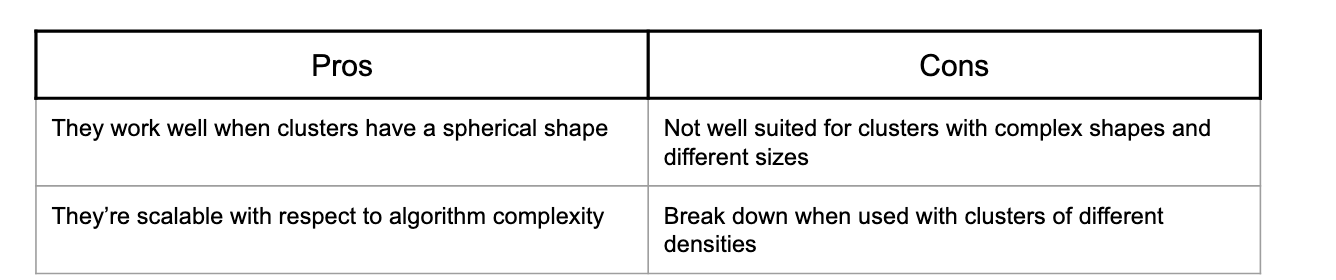

# Alternative Clustering Methods to K-Means/Partitional Clustering

## Hierarchical Clustering

- Will determine cluster assignments by building a hierarchy 
  - This is implemented by either a bottom-up or a top-down approach
- Top-down approach:
   - Agglomerative clustering
- Bottom-up approach:
   - Divisive clustering

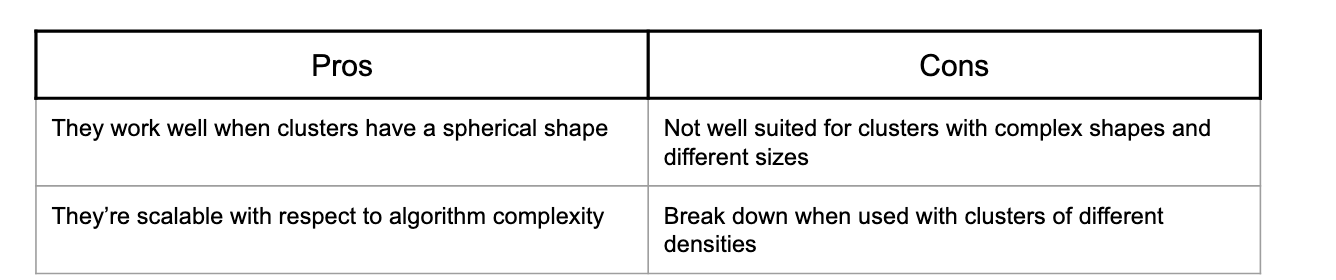

## Density Based Clustering

- Assignments based on the density of data points in a region 
   - Clusters are assigned where there are high densities of data points separated by low-density regions
- Two examples of density based clustering:
  - DBSCAN
  - OPTICS


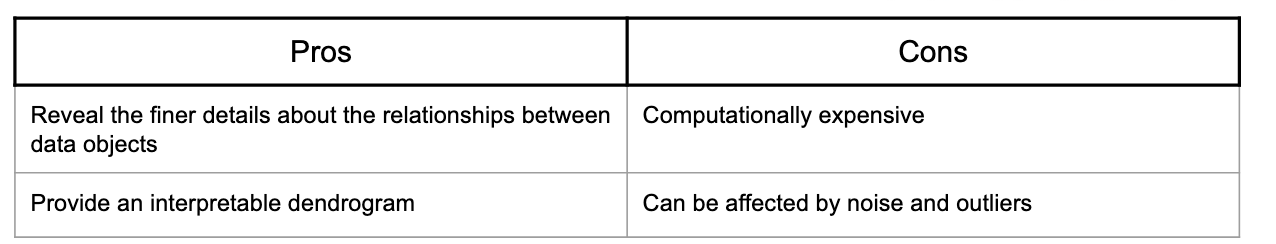

# Why to Use K-Means Clustering

- Comparatively fast to other clustering algorithms
- Extremely popular and well studied/documented
- Many common implementations
  - Languages such as R, Python, MATLAB, and even JAVA have K-means clustering


# A Brief Detour: Supervised vs Unsupervised Learning

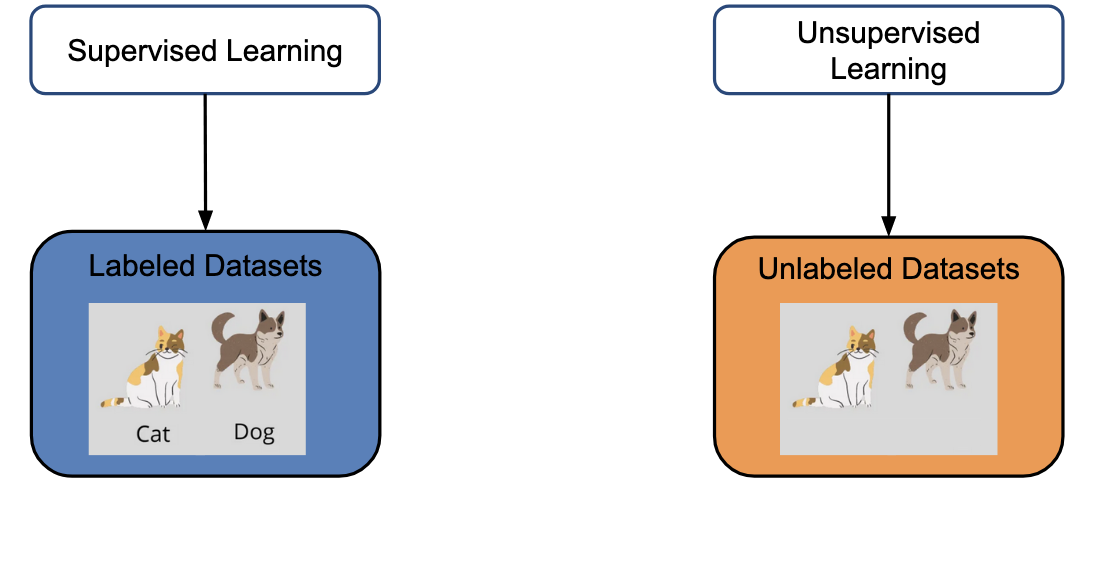

K-means clustering falls underneath, unsupervised learning.

## Supervised Learning: Pros and Cons

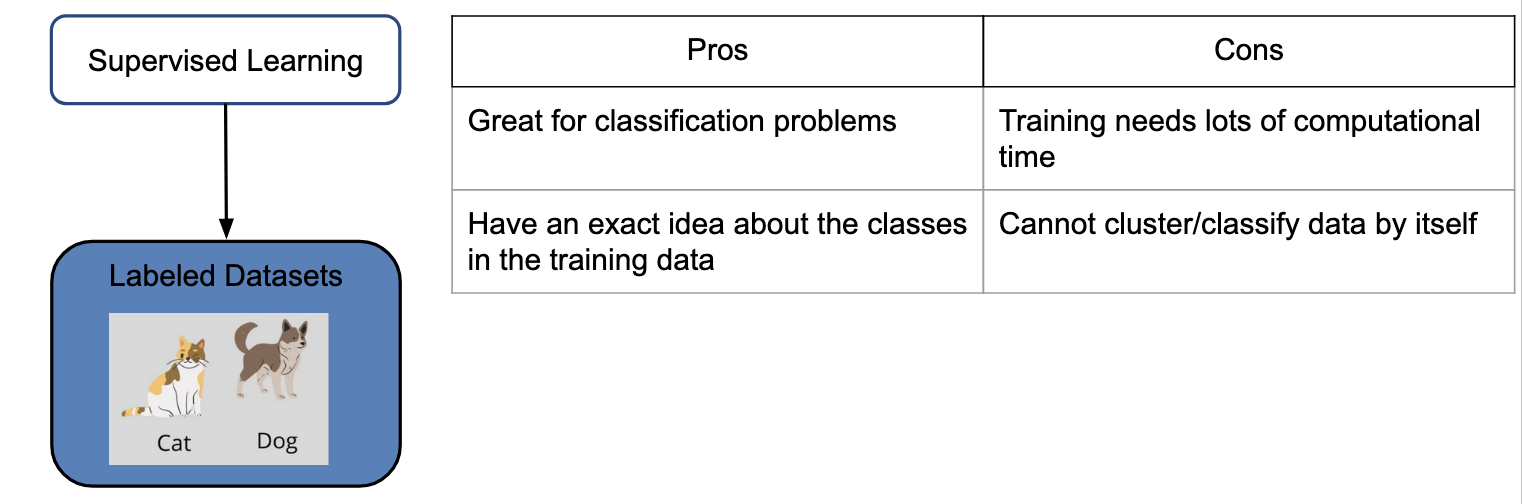

## Unsupervised Learning: Pros and Cons

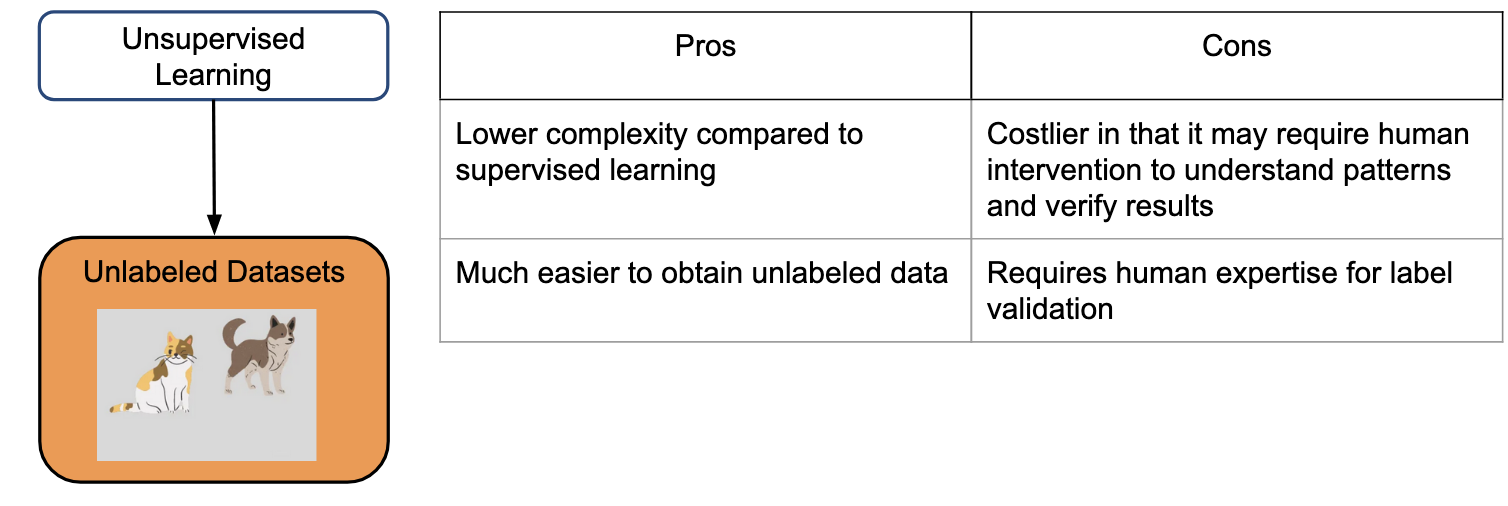

# Back to K-means Clustering

## K-Means Clustering Steps
Throughout this subsection will be a breakdown of the k-means clustering steps. There will be 7 total steps shown, which will be the following: 
1. Select number of clusters
2. Randomly select initial clusters
3. Measure distance between initial clusters and data points
4. Assign data points to clusters
5. Upon completition of assigning all data points to a cluster, calculate the mean of each cluster
6. Using the mean calculation of each cluster we measure the distance between data points and mean then assign point to cluster
8. Compare iterations

### 1. Select Number of Clusters

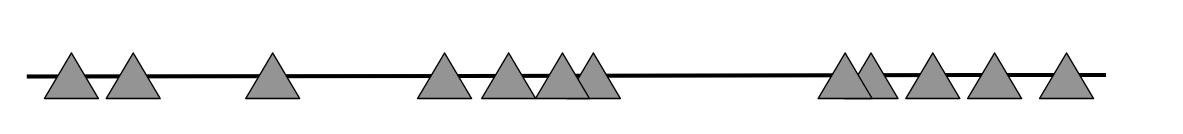

For this example, we can see that there are three distinct clusters visually. Therefore we will select our number of clusters to be **k=3**. 

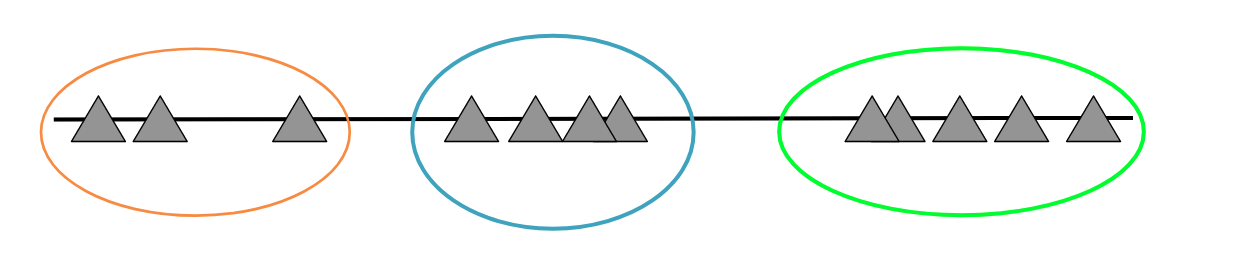

## 2. Randomly Select Initial Clusters
At this step, we do not add extra data points to become initial clusters, we choose points that are already within our dataset to become initial clusters.

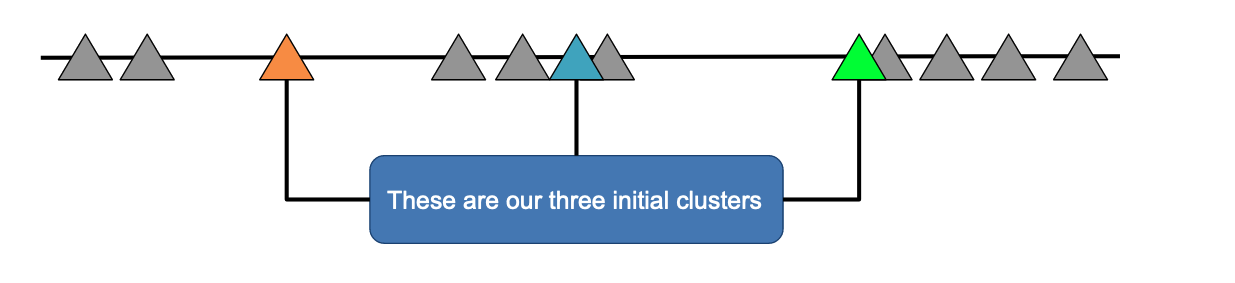

The above three initial clusters were arbitrarily chosen. However, there are different initialization techniques that can be used. A few will be outlined below:

# ADD INFO ABOUT INITIALIZATION TECHNIQUES HERE

https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html

## 3. Measure Distance Between Initial Clusters and Datapoints

For this arbitrary example, we begin to measure the distance of data point 1 (denoted with a pink circle) against each initial cluster (denoted with a red circle). 

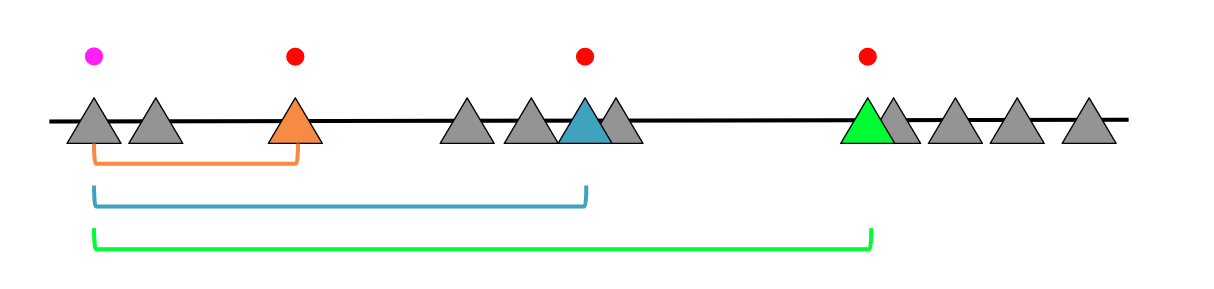

## 4. Assign Datapoints to Cluster

Upon measuring the distance from data point 1 to each initial cluster, we assign that data point to a cluster based off the shortest distance. Due to this, we will assign data point 1 to the orange clustering group which can be seen below.

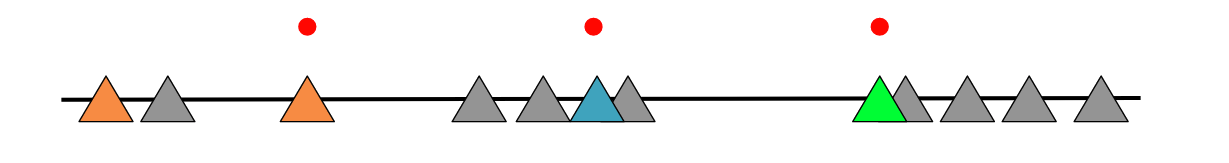

At this stage we will repeat **Step 3** and **Step 4** until all points have been assigned. To see the final cluster assignment for this set of datapoints see below. 

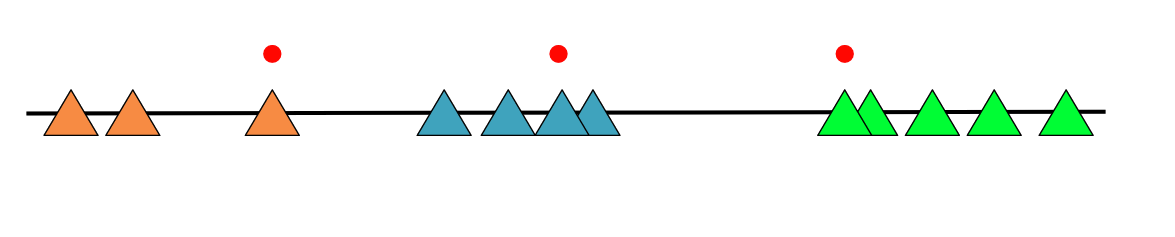

## 5. Calculate the Mean of Each Cluster
For this step, we will calculate the mean of each cluster. This is an arbitrary example, thus, no real numbers are being used. However, the arbitrary calculated mean is represented by a bar.

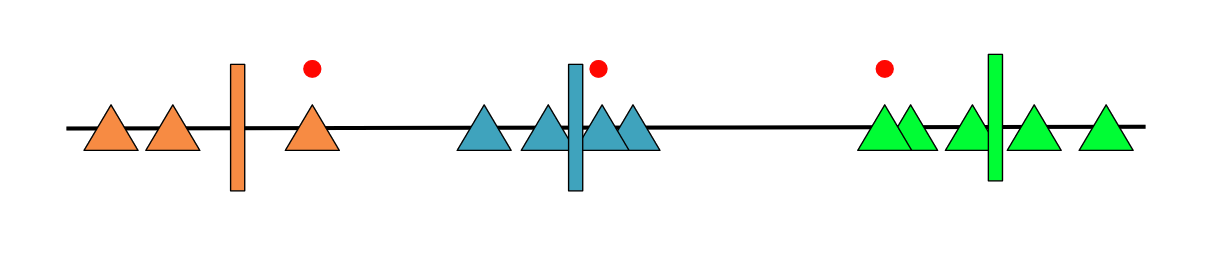

Upon calculating the mean of each cluster, we then will "reset" all data points such that they do not have a cluster assignment. This can be seen below.

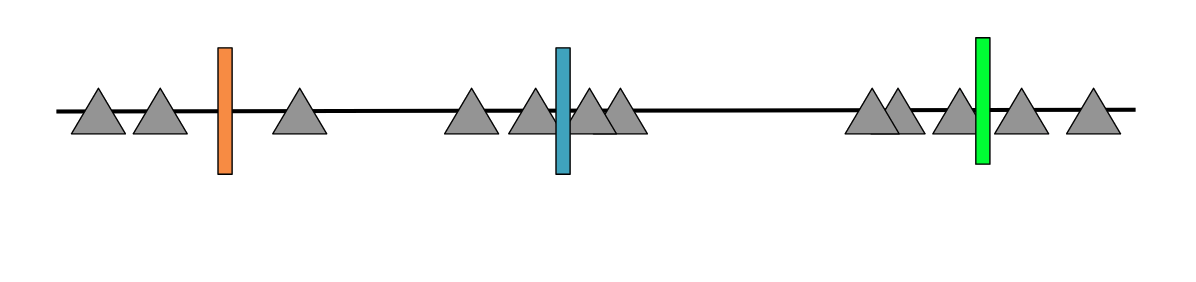

## 6. Measure Distance Between Datapoints and New Initial Clusters (Mean) then Assign Point to Cluster
This step is identical to the previous shown **Step 3** and **Step 4**, the only difference is we use the calculated mean of the initial clustering assignment as our initial clusters.

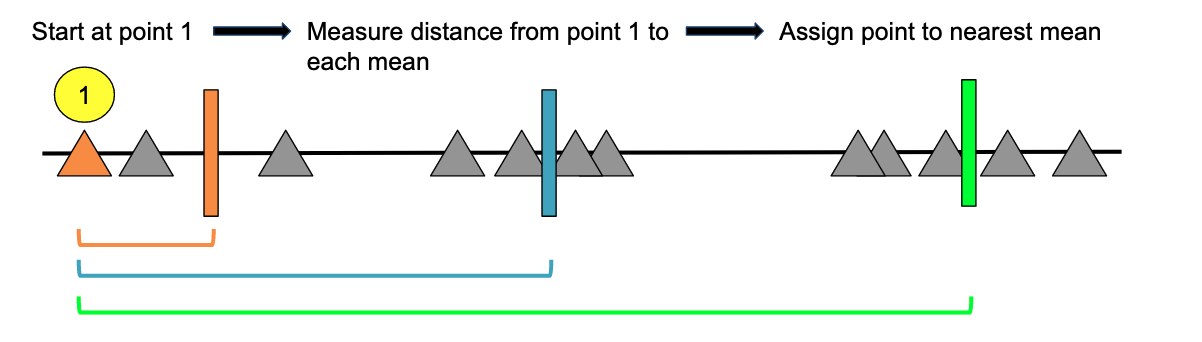

Below will be the resulting clustering assignment after all datapoints have been measured and assigned to their respective clustering group.

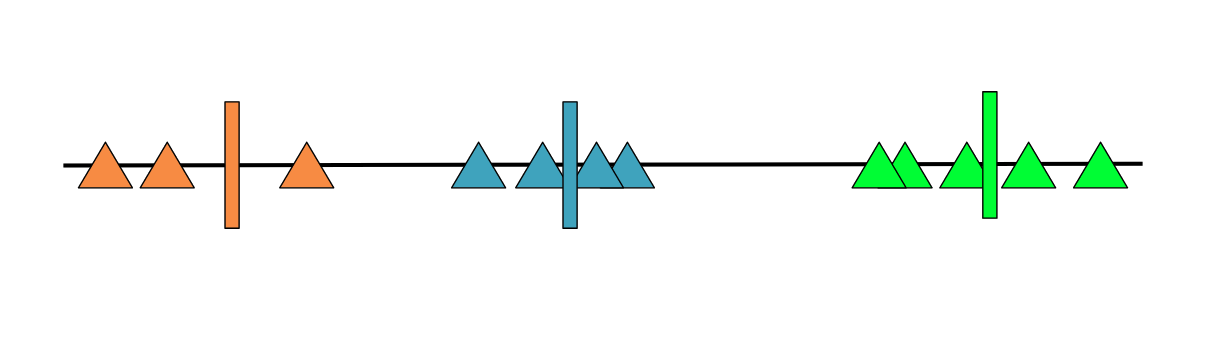

## 7. Compare Iterations
At this stage, we now have completed two iterations of K-means clustering; therefore, we will compare iterations. There are two outcomes that can occur upon comparing iterations:
1. If both the current and previous iteration are the same, then we are done
2. If the current and previous iteration are different, then we continue until they are identical

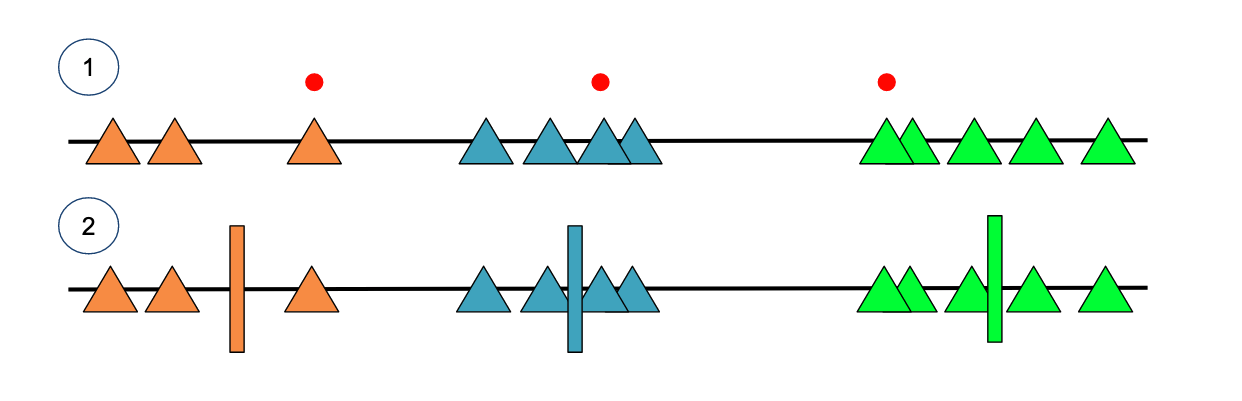

As you can see from above, iteration 1 and iteration 2 are the exact same and thus we have completed our k-means clustering.

# Can This be Done in 2-D?
The example shown above, was only in 1-D, so a possible question could be that: Can we perform k-means clustering in 2-D? The answer is yes. 

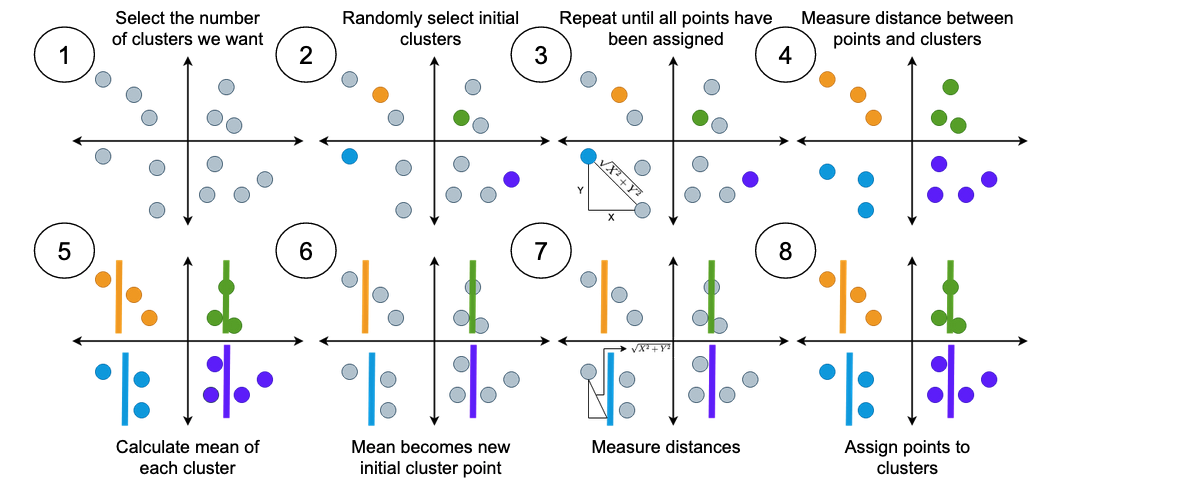

# `KmeansAnalysis` Class (What I have Done/What I have accomplished)

In [3]:
class KmeansAnalysis:
    def __init__(self, feature=None, target=None, normalization = "standard"):
        """
        Arguments
        ----------
            feature (ndarray): 
        
            target (ndarray): 
            
            normalization (str): Optional argument, default is "standardization"
                                 Data scaling, with three available options:
                                 - "standardization" = StandardScaler()
                                 - "minmax" = MinMaxScaler()
                                 - "robust" = RobustScaler()
        """
        self.feature = feature
        self.target = target
        
        if not isinstance(self.feature, np.ndarray):
            raise ValueError("Must pass in a numpy array for the argument feature.")
        if not isinstance(self.target, np.ndarray):
            raise ValueError("Must pass in a numpy array for the argument target.")
        
        if normalization == "standard":
            self.normalization = StandardScaler()
        elif normalization == "minmax":
            self.normalization = MinMaxScaler()
        elif normalization =="robust":
            self.normalization = RobustScaler()
        else: 
            raise ValueError("Please enter a valid normalization technique: standardization, minmax, or robust")
        
        self.scaler = self.normalization
        self.scaled_data=self.scaler.fit_transform(self.feature)
        
    def cluster(self, **kmeans_kwargs):
        # performing feature scaling
        set_normalization = self.normalization
        scaled_feature = set_normalization.fit_transform(self.feature)
        
        # finding optimal number of clusters
        sil_coeff = []
        for s in range(2, 11):
            kmeans = KMeans(n_clusters=s, **kmeans_kwargs)
            kmeans.fit_predict(scaled_feature)
            sil_coeff.append(silhouette_score(scaled_feature, kmeans.labels_))
        # defining number of clusters k     
        k = sil_coeff.index(max(sil_coeff)) + 2
        
        
        opt_kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        
        prediction = opt_kmeans.fit_predict(scaled_feature)
        
        centroids = opt_kmeans.cluster_centers_
        # plot clustering results
        fig, ax = plt.subplots()
        fig.set_size_inches(18, 7)
        ax.scatter(scaled_feature[:, 0], scaled_feature[:, 1], c=prediction, cmap = "viridis")
        ax.scatter(centroids[:,0], centroids[:,1] , s = 300, c='r',marker="H")
        # Plot cluster centers
        ax.scatter(
            centroids[:, 0],
            centroids[:, 1],
            marker="H",
            c="red",
            alpha=1,
            s=600,
            edgecolor="k",
        )
        # Label cluster centers on plot
        for i, c in enumerate(centroids):
                ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_title("Clustering Plot for Featured Data")
        
        # Generate actual clustering labels
        label_encoder = LabelEncoder()
        true_labels = label_encoder.fit_transform(self.target)
    
        
        labels = kmeans.labels_ #ask Ian why we get values of 8 and such
        
        #may wany to add check to see if they already passs true labels
                
        correct_labels = sum(true_labels == labels)

        print("Result: %d out of %d samples were correctly labeled." % (correct_labels, self.target.size))
        print('Total Cluster Accuracy: {0:0.2f}'.format(correct_labels/float(self.target.size)))

        
        return ax
    
    def elbow_method(self, **kmeans_kwargs):
        """Displays an elbow plot to show optimal number of clusters.
        
        Arguments
        ----------
        kmeans_kwargs (dict): Set options for Kmeans algorithm parameters
        
        Returns
        ----------
        plot (axes): Elbow plot to be displayed to user. A redline will be marked through the optimal
                     number of clusters.
        """
        
        # calculate optimal cluster
        sse = []
        for k in range(2,11):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(self.scaled_data)
            sse.append(kmeans.inertia_)
        
        print(sse)
        kl = KneeLocator(
            range(2, 11), sse, curve="convex", direction="decreasing"
        )
        
        # plotting elbow plot
        fig, ax = plt.subplots()
        fig.set_size_inches(18, 7)
        plt.style.use("seaborn-whitegrid")
        ax.axvline(kl.elbow, ls='--', color='r')
        ax.plot(range(2, 11), sse, linestyle='--', marker="o", color="b", markersize=10)
        ax.set_xlabel("k-number of clusters")
        ax.set_ylabel("wcss")
        plt.xticks(range(2,11))
        plt.title("Elbow Plot")
    
    
    def dunn_index(self):
        # Will need to think on this more
        print(1)
        
    def inertia(self, **kmeans_kwargs):
        """Display a bar chart to show magnitude of inertia values depending on number of clusters.
        
         Arguments
        ----------
        kmeans_kwargs (dict): Set options for Kmeans algorithm parameters
        
        Returns
        ----------
        plot (axes): Bar plot to be displayed to user.
        """
        inertia = []
        for k in range(2,11):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(self.scaled_data)
            inertia.append(kmeans.inertia_)
    
        fig, ax = plt.subplots()
        plt.style.use("seaborn-whitegrid")
        ax.bar(range(2, 11),inertia, color="b")
        ax.set_xticks(list(range(2,11)))
        ax.set_xlabel("Number of Clusters")
        ax.set_ylabel("Inertia Value")
        ax.set_title("Bar Chart: Inertia Scores")
        
    def silhouette(self, num_clusters=None, show_clustering = False, **kmeans_kwargs):
        """Displays silhouette and clustering plot.
        
        Arguments
        ----------
        num_clusters (num): Number of clusters to test via silhouette plot.
                            Number of clusters to test will be k=2 to k=num_clusters.
                            
        kmeans_kwargs (dict): Set options for Kmeans algorithm parameters
        
        Returns
        ----------
        plot (axes): Silhouette chart and clustering plot.    
        """
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)
        ax1.set_ylim([0, len(self.feature) + (num_clusters + 1) * 10])
            
        clusterer = KMeans(n_clusters=num_clusters, n_init=10, random_state=10)
        cluster_labels = clusterer.fit_predict(self.feature)
            
        silhouette_avg = silhouette_score(self.feature, cluster_labels)
        print(
            f"The silhouette score for {num_clusters} clusters is: {silhouette_avg}"
        )

        # Calculate the silhouette score for featured data
        sample_silhouette_values = silhouette_samples(self.feature, cluster_labels)

        y_lower = 10
        for i in range(num_clusters):
            # Gathering silhouette scores
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.viridis(float(i)/num_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Cluster labels on y-axis
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute new y for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
            
        # Plot title/x and y labels
        ax1.set_title(f"Silhouette Plot for {num_clusters} Clusters")
        ax1.set_xlabel("Silhouette Coefficient Values")
        ax1.set_ylabel("Cluster Assignment")

        # Vertical line to indicate average silhouette score across clusters
        ax1.axvline(x=silhouette_avg, color="red", linestyle="dashdot",linewidth=4)
        
        # Remove the y-axis labels and tick marks
        ax1.set_yticks([])

        if show_clustering:
            fig, ax2 = plt.subplots(1, 1)
            fig.set_size_inches(18, 7)
            
            # creating a color map for clustering points
            color = cm.viridis(cluster_labels.astype(float)/num_clusters)
            ax2.scatter(
                self.feature[:, 0], self.feature[:, 1], marker=".", s=60, lw=0, alpha=0.7, c=color,edgecolor="k"
            )

            # Gathering cluster centers using scikit learns built in function
            centers = clusterer.cluster_centers_
            # Cluster centers
            ax2.scatter(
                centers[:, 0],
                centers[:, 1],
                marker="H",
                c="red",
                alpha=1,
                s=600,
                edgecolor="k",
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
            

            ax2.set_title(f"Visualization of Clustering Assignment for {num_clusters} clusters")
            ax2.set_xlabel("Feature Space 1")
            ax2.set_ylabel("Feature Space 2")

# Breakdown of `KmeansAnalysis` Class

To show a breakdown of the `KmeansAnalysis` class, we will use artifical data generated by using `make_blobs` from `scikit-learn`. The function `make_blobs` will generate isotropic gaussian blobs for clustering. <br>

This is being done such that we can breakdown each method and verify the results of the `KmeansAnalysis` class before moving onto a real world example. Below will be the arguments and values used for the walkthrough/demo fo the `KmeansAnalysis` class.

In [4]:
x, y = make_blobs(
    n_samples=500,
    n_features=3,
    centers=3,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

Along with `make_blobs` we will utilize the below `KMeans` clustering parameters:

In [5]:
kmeans_args = {
            "init": "random",
            "n_init": 10,
            "max_iter": 300,
            "random_state": 42,
}

# Instantiating `KmeansAnalysis` Class
When instatiation the `KmeansAnalysis` class there are four arguments:
 - feature
 - target
 - normalization: type of feature scaling to perform. Options include:
     - "standard" = StandardScaler()
     - "minmax" = MinMaxScaler()
     - "robust" = RobustScaler()
 - kwargs

In [6]:
instance = KmeansAnalysis(feature = x, target=y)

# Demo of `cluster` Method within `KmeansAnalysis` Class

Result: 35 out of 500 samples were correctly labeled.
Total Cluster Accuracy: 0.07


<AxesSubplot:title={'center':'Clustering Plot for Featured Data'}, xlabel='Feature 1', ylabel='Feature 2'>

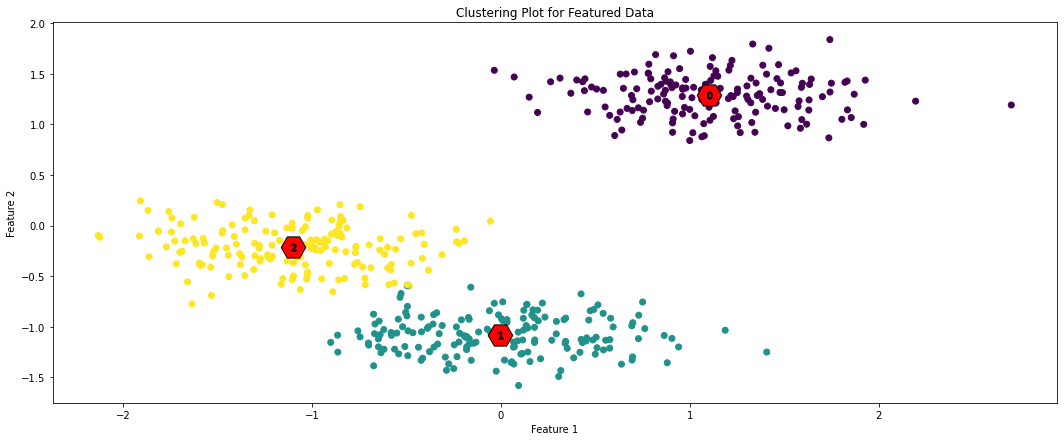

In [7]:
instance.cluster(**kmeans_args)

# Demo of `KmeansAnalysis` Evaluation Tools

## Elbow Method
With the `elbow` method**, we allow a user to determine the optimal number of clusters for their data. <br>

To perform the `elbow` method, we will perform several clusterings with k-means, increment k with each iteration, and record the within cluster sum of squares (wcss). <br>

After performing several k-means and incrementing, we will plot the results. On the x-axis will be the number of clusters and on the y-axis will be the asscociated wcss for each k. <br>

Below will be an example elbow plot, it gets its name due to it having a similar shape to a bent human elbow.

[570.9555238060486, 156.9893819740588, 132.6121182545685, 113.1926848308106, 93.38861449637044, 87.98224769691697, 82.33962035295072, 77.234854292827, 71.43861124014083]


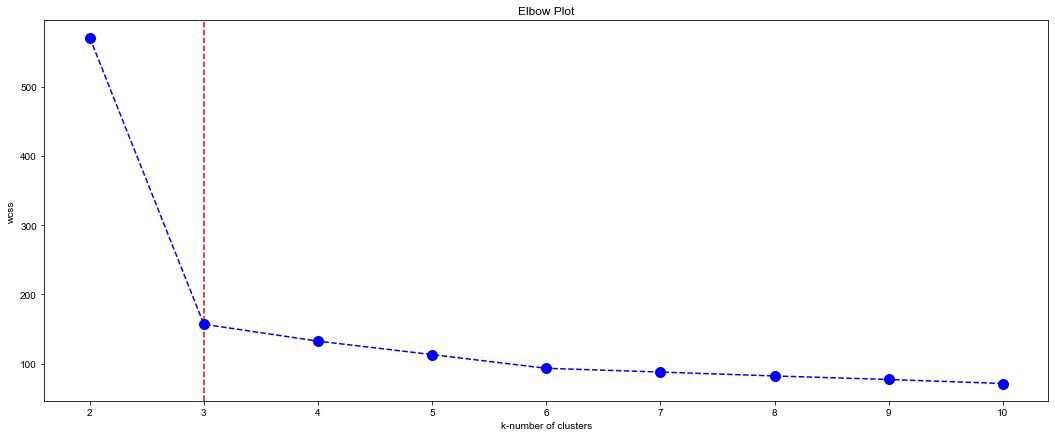

In [8]:
instance.elbow_method(**kmeans_args)

## Inertia Scores with Bar Chart

Inertia is an evaluation technique that calculates the sum of distances of all the points within a cluster from the centroid of that cluser. This distance is defined as intracluster distance. <br>

With inertia distance can be the following two metrics:
 - Euclidean distance (Numerical data)
 - Manhattan disttance (Categorical data)
 
Each cluster has the intracluster distance calculated and the sum of all clusters intracluster distances will be the final inertia value. For inertia a lower value is an indication that the clustering model performed well. <br>

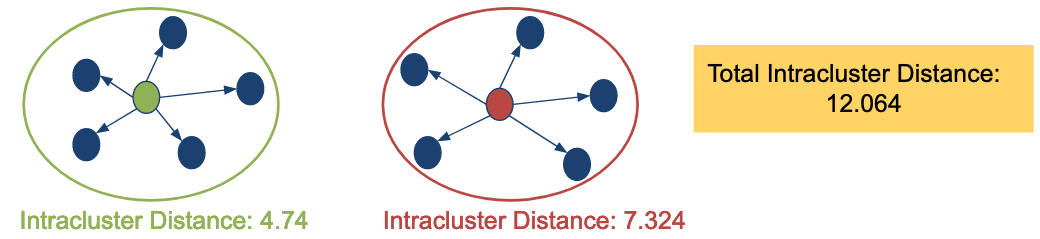

With the `inertia` method, we allow a user a visual analysis tool to see how a k-means clustering model may perform for their data based on the number of clusters-k. Please see a demo of this method below.<br>

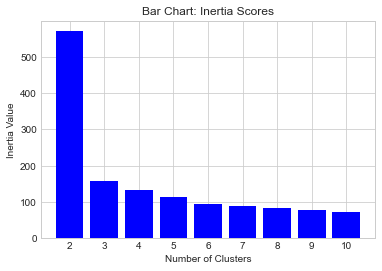

In [9]:
instance.inertia(**kmeans_args)

## Silhouette Score
Silhouette score is an evaluation technique that is composed of two connect parts: 
 - A numeric score
 - A plot to visualize the numeric scores
 
A silhouette score is calculated by measuring the similairty of a point to the points assigned within its own cluster and other clusters.

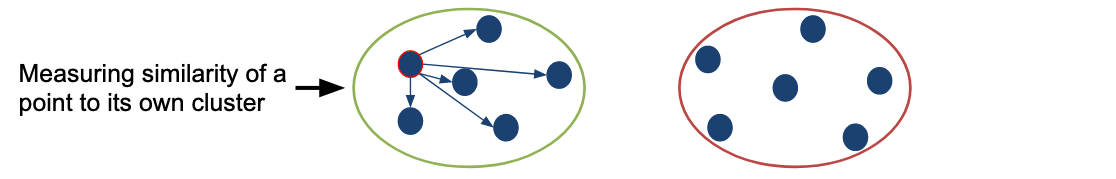

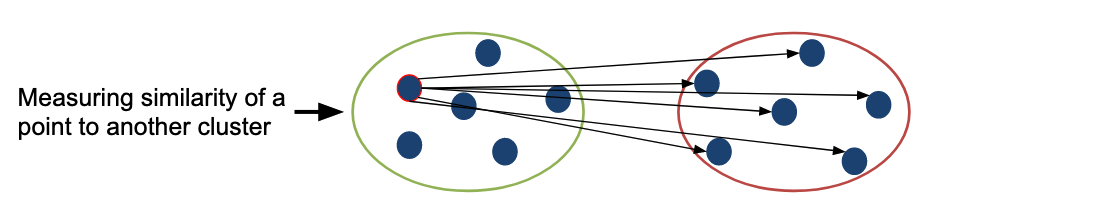

A silhouette score can range between -1 and 1. Below will be a breakdown for a negative score, zero score, and a positive score:
 - A negative score suggests that poor clustering has occured
   - This may be due to not having the correct number of clusters or the data hasn't been properly cleaned
 - A score close to zero suggests to overlapping clusters
 - A positive score indicates that the clusters are well separated, and each sample is more similar to the samples in its own cluster than to the samples in other clusters

With the `silhouette` method, we allow a user a visual representation of a silhouette plot which can aid in a user seeing:
 - How many points are assigned to each cluster, this is represented by the height of each silhouette
 - Fluctuation in size of silhoutte indicates if the clustering is optimal/suboptimal clustering
 - Average silhouette values for all clusters, this is indicated by the red dotted line
 
Below will be a demo of the `silhouette` method.

The silhouette score for 4 clusters is: 0.586759261957681


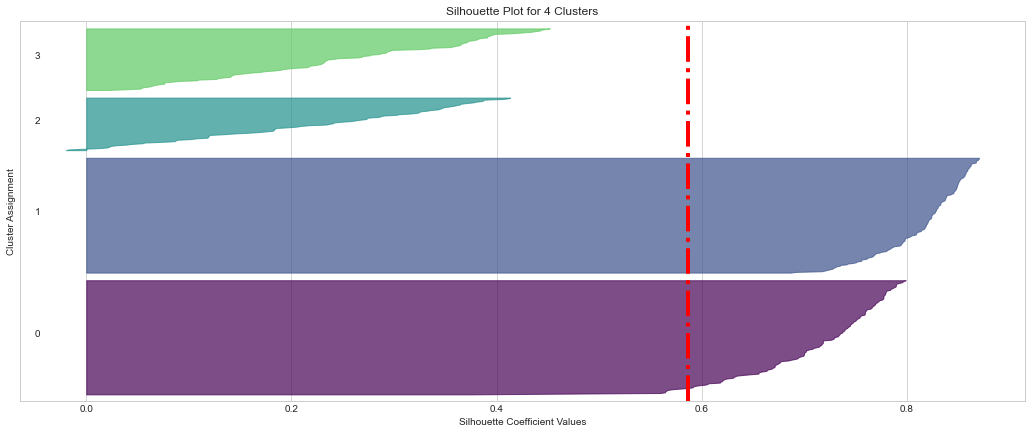

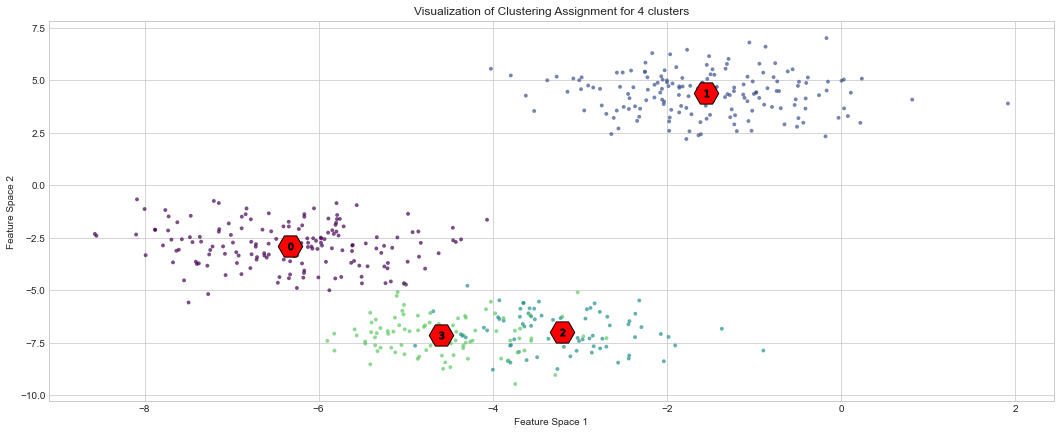

In [10]:
instance.silhouette(num_clusters=4,show_clustering=True)

# `KmeansAnalysis` Class Demo Using Diabetes Dataset

## Loading `iris` Dataset

In [13]:
df = pd.read_csv("/Users/trebu/Downloads/Iris.csv")

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Brief Exploratory Analysis of Columns of Interest
For the analysis performed throughout the following cells, we will look at the columns `SepalLengthCm` and `PetalWidthCm`. 

Text(0.5, 1.0, 'Scatter plot for Data of Interest')

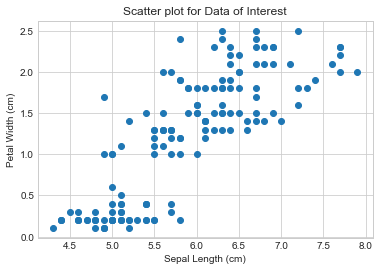

In [15]:
plt.scatter(df["SepalLengthCm"],df["PetalWidthCm"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter plot for Data of Interest")

From visualizing our two columns of interest we can see that there are two fairly distinct clusters. One in the lower left quadrant and the other being in the upper right quadrant. 

## Creating Numpy Arrays
For the `KmeansAnalysis` class the arguments `feature`and `target`must be `numpy.ndarrays`, therefore we will convert our data to be in this format now. 

In [16]:
feature_data = np.array(df[["SepalLengthCm","PetalWidthCm"]])

In [17]:
feature_data[0:5]

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2]])

In [18]:
target_data = np.array(df["Species"])

In [19]:
target_data[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

The `target` argument takes in categorical data and within the actual `KmeansAnalysis` class we will encode the categories with a cluster. 

## Calling the `KmeansAnalysis` Class and Passing Data

In [20]:
clustering = KmeansAnalysis(feature = feature_data, target = target_data)

Result: 0 out of 150 samples were correctly labeled.
Total Cluster Accuracy: 0.00


<AxesSubplot:title={'center':'Clustering Plot for Featured Data'}, xlabel='Feature 1', ylabel='Feature 2'>

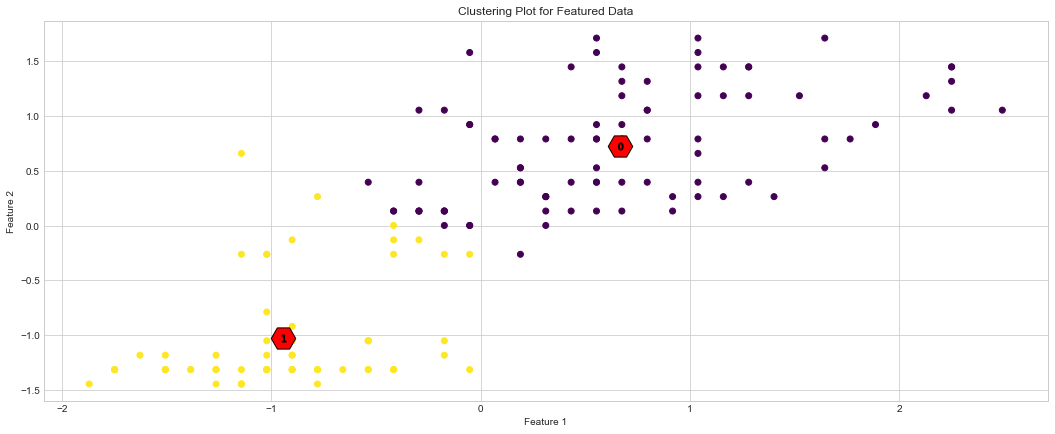

In [21]:
clustering.cluster()

From the above clustering plot, we can see that there were indeed two primary clusters that we originally saw within our exploratory analysis. Our clustering yielded 35 out of 150 samples as correctly labeled which gives us an accuracy of 23%. This is not the highest accuracy, so what are possible ways to improve results? <br>

1. Rerunning the KMeans algorithm, we could end up getting increased results simply due to the fact KMeans is randomized. The major drawback of this is you can also get lower accuracy.
2. Choosing a different initialization technique, this is how we choose our initial starting clusters (centroids), therefore a better technique could give us better initial clusters to cluster off of.
3. More data, the `iris` dataset only has a total of 150 datapoints within it, therefore adding more data could increase accuracy. 

## Calling the `elbow_method` on Data of Interest

[94.0254328489115, 51.146566670243736, 38.60907618675403, 30.227490149700007, 24.543864880263275, 19.888086924313946, 17.10449204134994, 14.639642667783496, 12.538014563332965]


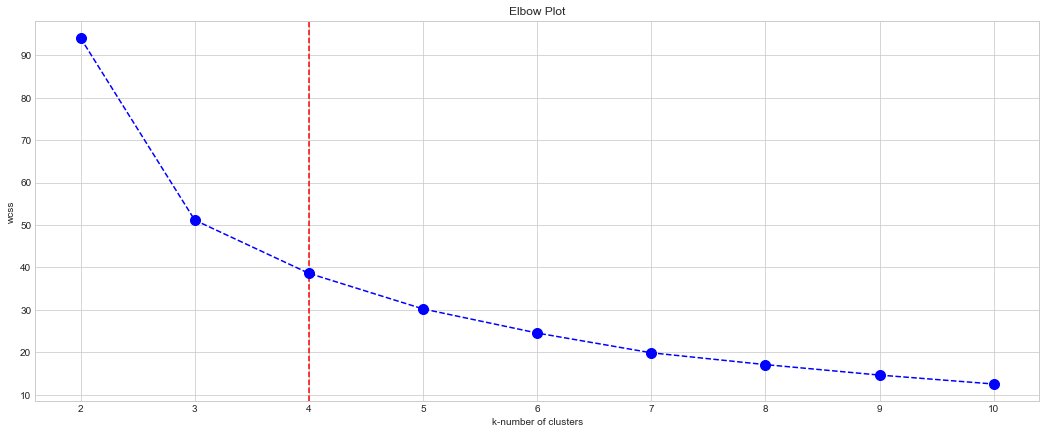

In [22]:
clustering.elbow_method()

As stated earlier within the jupyter notebook, the elbow method is a popular method to help with determining the correct number of initial clusters **k**. However, as shown with the above plot there can be inaccuracies with using this method. Unfortunately the elbow method, is extremely subjective and sensitive for some datasets and might not work properly. <br>

## Calling the `inertia` Method on Data of Interest

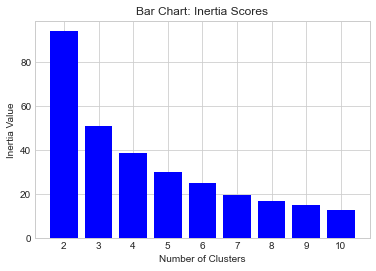

In [23]:
clustering.inertia()

With inertia, the lower the value the better the clustering would be. However, these results can be skewed due to the fact that as we increase the number of clusters, inertia is most likely always going to decrease. Which can lead to skewed results. Based off the above graphic we would want to let our number of clusters be equal to 10. However, this would would be our skewed result. <br>

If we remember the definition of inertia is: **the sum of distances of all the points within a cluster from the centroid of that cluser**. Which means that as we increase the number of clusters, the points will get closer and closer to the centroid, which will subsequently decrease our inertia value. Therefore, we must remember when using inertia to look for the minimum number of clusters that gives us a reasonable value. Which in this case would be 3 or 4.

## Calling the `silhouette` Method on Data of Interest

When performing the `silhouette` method for 2 clusters we get a score of roughly 0.55. Comparatively, to the other clusters tested this is the highest score indicating to us that indeed 2 clusters would be the best **k** value. This is opposite of the `elbow_method` and the `intertia` method. 

Overall we believe, the `silhouette` method to be the best analysis tool available to a user. A few reasons are the following: 
 - With the silhouette plot, we can visually see how the height fluctuates. If there is not much fluctuation then we have an optimal clustering. As you can see with our example, we do have some fluctuation in height for both cluster 0 and cluster 1, but for the most part the height stays relatively similar throughout. 
 - We can output the actual clustering assignments. This is advantageous because we can visually see how the data points were assigned, and quickly get a good indication if the clustering does make sense.
 - Lastly, the silhouette score could be deemed a more accurate metric due to it measuring the similiarity of a datapoint to the points within its cluster assignment and points within another cluster assignment. 

The silhouette score for 2 clusters is: 0.5568873645564891


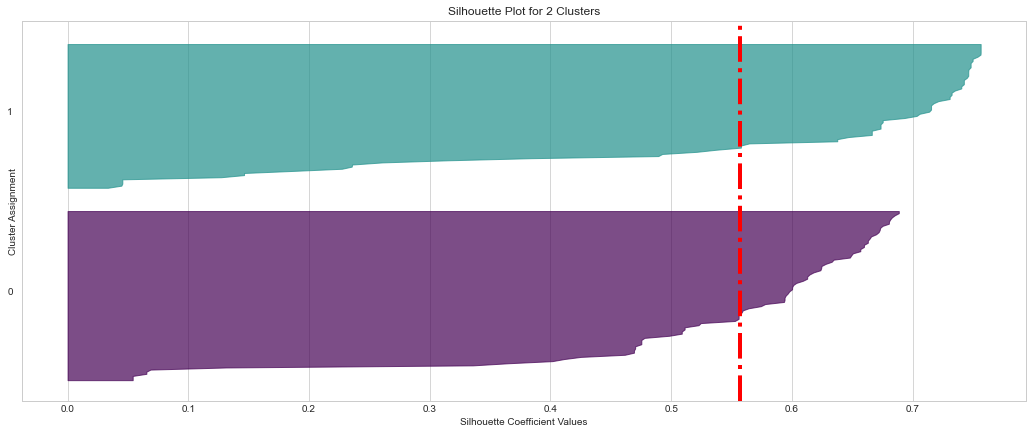

In [24]:
clustering.silhouette(num_clusters=2)

The silhouette score for 2 clusters is: 0.5568873645564891


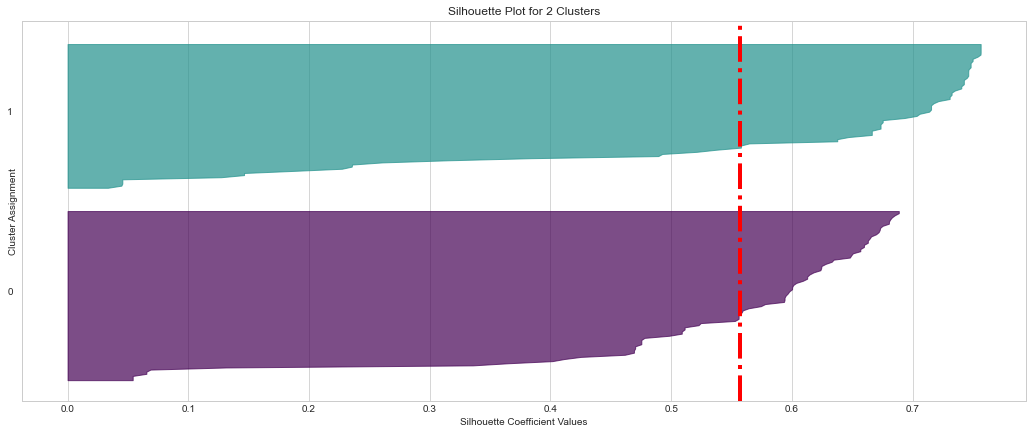

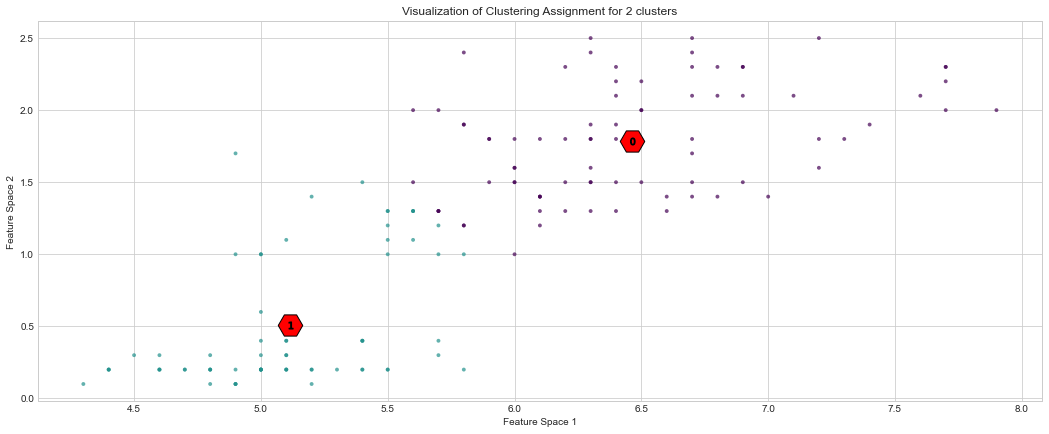

In [25]:
clustering.silhouette(num_clusters=2,show_clustering=True)

# Discussion on Possible Avenues to Improve `KmeansAnalysis` Class

 - Need to see if I can end up getting the Dunn Index added

## Adding More Plotting Flexibility with `**kwargs`

Python offers a convenient way to pass multiple arguments that are not initially required by a function or method. This is done by passing `**kwargs` to either a method or a function within python. Two possible ways to pass keyword arguments are:
 - `key = value (e.g. color = "red")`
 - `{"Key 1": Value 1, "Key 2": Value 2} e.g.({"color" = "red"})`

By adding `**kwargs` to the plotting methods within the `KmeansAnalysis` class, we can provide users with more flexibility to change the plots to their desired specifications. A few notable keyword arguments a user could pass are: 
 - color 
 - linewidth
 - linestyle
 - marker
 - etc.

What are the notable drawbacks?
 - Implementing `**kwargs` within code. This is not necessarily difficult, but you want to make sure it is done correctly. 
 - Inital plots may not have the best format until a user decides to pass keyword arguments to improve plot.

## Adding a Data Cleaning Method
Throughout this jupyter notebook two datasets have been used. One dataset was generated using `make_blobs` from scikit-learn and the other is a dataset provided by Kaggle. What both of these datasets had in common is they are both **clean**. Meaning there are no missing values (NA's), data types are the same, everything is correctly labeled, etc. 

Within actual real world work, many datasets will not actually be **clean** and thus will contain missing values, be missed labeled, and data types will not be the same. Therefore adding a possible data cleaning method to the `KmeansAnalysis` class would be advantagous for a potential user. 

What would a cleaning method look like? A possible cleaning method could look like the following pseudo code: `clean(missing_value, remove_duplicates, remove_outliers)`

Where the arguments would have the following purpose:
 - `missing_value` - how to replace missing values, with possible options being mean, mode, median, interpolation, backward fill and forward fill. 
 - `remove_duplicates` - remove duplicate obserations, with a boolean True or False needing to be provided such that this action will be performed.
 - `remove_outliers` - remove outliers within the dataset, with a boolean True or False needing to be provided such that this action will be perormed. 
 
Pros: 
 - Allows a user to save time on cleaning their data and get immediately to analysis

Cons:
 - This method will be extremely difficult to implement correctly, besides the `missing_values` argument
 - Data may not be fully cleaned properly
   - Data could have structural errors such as strange naming conventions, and that would be out of scope for a Python function/method to fix properly without a user intervening 

## Adding Ability for a User to Pass in a `DataFrame`, `Pandas.Series`, or `List`

At current construction of the `KmeansAnalysis` class, both the arguments `feature` and `target` must be `numpy.ndarray's`. The restriction for this was added by myself such that the data would come in a format that the `KMeans` class from scikit-learn easily would take. However, many users will not have their data in the format of a `numpy.ndarray`, instead it will be a `DataFrame`, `pandas.series`, or a `list`.

A further improvement to the class would be to allow the arguments `feature` and `target` to not be restricted to `numpy.ndarray's`. Instead allowing a user to pass in a `DataFrame` with specifically selected columns, two `pandas.series` one for `feature` and the other for `target`, and lastly a `list` of values. 

Internally within the `KmeansAnalysis` class we would convert these 3 different data structures into a `numpy.ndarray` still, but we wouldn't restrict a user by data structures anymore. 

Possible implementation of this can be seen with the pseudo code below:

```

if isinstance(feature, [pd.DataFrame, pd.Series, list]):
    convert feature to numpy.ndarray
    
if isinstance(target, [pd.DataFrame, pd.Series, list]):
    convert target to numpy.ndarray

```

# Sources
Throughout this jupyter notebook the information and code gathered have come from vairous sources. Below will be these sources cited.

1. Arvai, Kevin. “Welcome to Kneed’s Documentation!¶.” Welcome to Kneed’s Documentation! - Kneed 0.6.0 Documentation, kneed.readthedocs.io/en/stable/. Accessed 24 June 2023. 
2. h2oai. “H2oai/H2O-3: H2O Is an Open Source, Distributed, Fast &amp; Scalable Machine Learning Platform: Deep Learning, Gradient Boosting (GBM) &amp; XGBoost, Random Forest, Generalized Linear Modeling (GLM with Elastic Net), K-Means, PCA, Generalized Additive Models (GAM), RuleFit, Support Vector Machine (SVM), Stacked Ensembles, Automatic Machine Learning (Automl), Etc..” GitHub, github.com/h2oai/h2o-3. Accessed 24 June 2023. 
3. “K-Means Clustering in Python: A Practical Guide.” Real Python, 30 Jan. 2023, realpython.com/k-means-clustering-python/. 
4. “Selecting the Number of Clusters with Silhouette Analysis on Kmeans Clustering.” Scikit, scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html. Accessed 24 June 2023. 
5. Sharma, Pulkit. “The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications.” Analytics Vidhya, 19 May 2023, www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/. 
6. “Sklearn.Cluster.Kmeans.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Accessed 24 June 2023. 